# Linear regression: Loss

Loss is a numerical metric that describes how wrong a model's predictions are. 

Loss measures the distance between the model's predictions and the actual labels. 

The goal of training a model is to minimize the loss, reducing it to its lowest possible value.

In the following image, you can visualize loss as arrows drawn from the data points to the model. 

The arrows show how far the model's predictions are from the actual values.

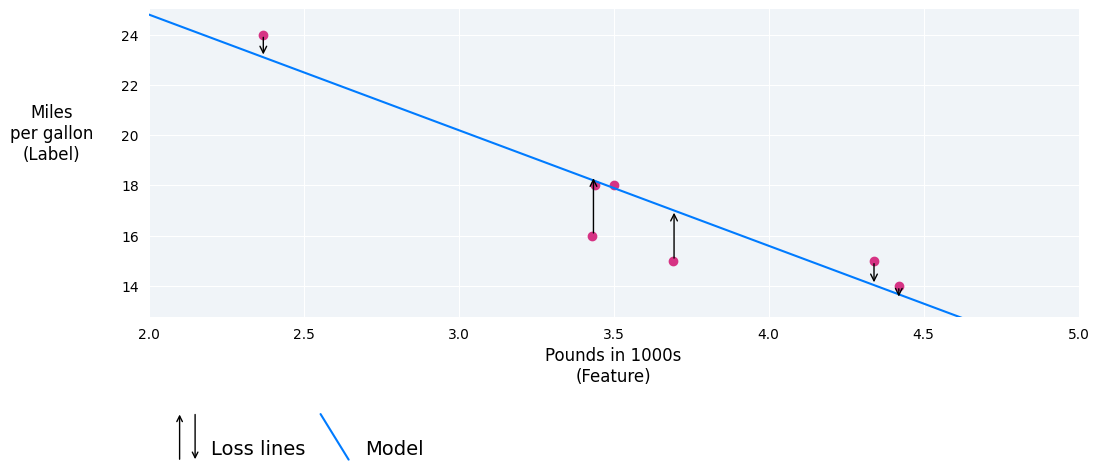

## Types of loss

In linear regression, there are four main types of loss, which are outlined in the following table.

The functional difference between L1 loss and L2 loss (or between MAE and MSE) is squaring. 

When the difference between the prediction and label is large, squaring makes the loss even larger. When the difference is small (less than 1), squaring makes the loss even smaller.

When processing multiple examples at once, we recommend averaging the losses across all the examples, whether using MAE or MSE.

### L1 loss	
The sum of the absolute values of the difference between the predicted values and the actual values.

A loss function that calculates the absolute value of the difference between actual label values and the values that a model predicts. 

L1 loss is less sensitive to outliers than L2 loss.

The Mean Absolute Error is the average L1 loss per example.

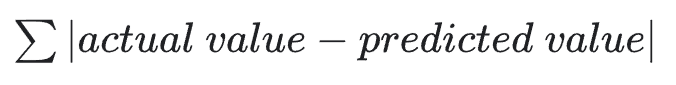

### Mean absolute error (MAE)
The average of L1 losses across a set of *N* examples.	

The average loss per example when L1 loss is used. Calculate Mean Absolute Error as follows:

1. Calculate the L1 loss for a batch.
2. Divide the L1 loss by the number of examples in the batch.

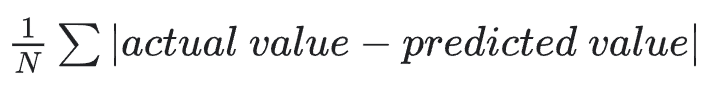

Mean Absolute Error = L1 loss / Number of Examples

Mean Absolute Error = 8/5 = 1.6

### L2 loss
The sum of the squared difference between the predicted values and the actual values.	

A loss function that calculates the square of the difference between actual label values and the values that a model predicts.

Due to squaring, L2 loss amplifies the influence of outliers. That is, L2 loss reacts more strongly to bad predictions than L1 loss. 

For example, the L1 loss for the preceding batch would be 8 rather than 16. Notice that a single outlier accounts for 9 of the 16.

Regression models typically use L2 loss as the loss function.

The Mean Squared Error is the average L2 loss per example. Squared loss is another name for L2 loss.

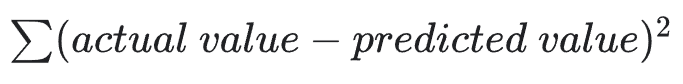

### Mean squared error (MSE) 
The average of L2 losses across a set of *N* examples.

The average loss per example when L2 loss is used. Calculate Mean Squared Error as follows:

1. Calculate the L2 loss for a batch.
2. Divide the L2 loss by the number of examples in the batch.

Mean Squared Error = L2 loss / Number of Examples

Mean Squared Error = 16/5 = 3.2

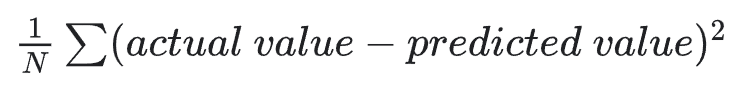

### Choosing a loss

Deciding whether to use MAE or MSE can depend on the dataset and the way you want to handle certain predictions. Most feature values in a dataset typically fall within a distinct range. For example, cars are normally between 2000 and 5000 pounds and get between 8 to 50 miles per gallon. An 8,000-pound car, or a car that gets 100 miles per gallon, is outside the typical range and would be considered an outlier.

An outlier can also refer to how far off a model's predictions are from the real values. For instance, 3,000 pounds is within the typical car-weight range, and 40 miles per gallon is within the typical fuel-efficiency range. However, a 3,000-pound car that gets 40 miles per gallon would be an outlier in terms of the model's prediction because the model would predict that a 3,000-pound car would get around 20 miles per gallon.

When choosing the best loss function, consider how you want the model to treat outliers. For instance, MSE moves the model more toward the outliers, while MAE doesn't. L2 loss incurs a much higher penalty for an outlier than L1 loss. For example, the following images show a model trained using MAE and a model trained using MSE. The red line represents a fully trained model that will be used to make predictions. The outliers are closer to the model trained with MSE than to the model trained with MAE.

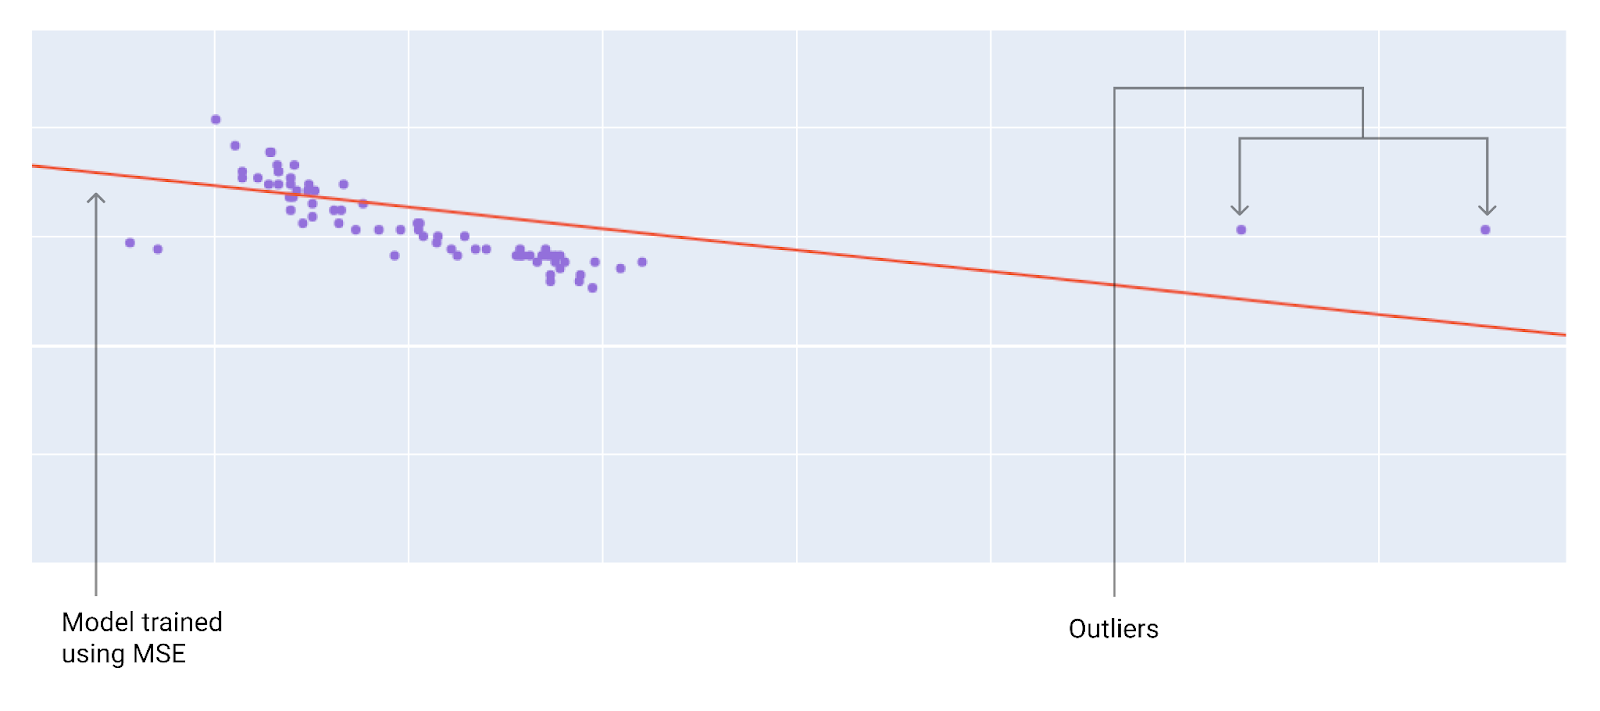

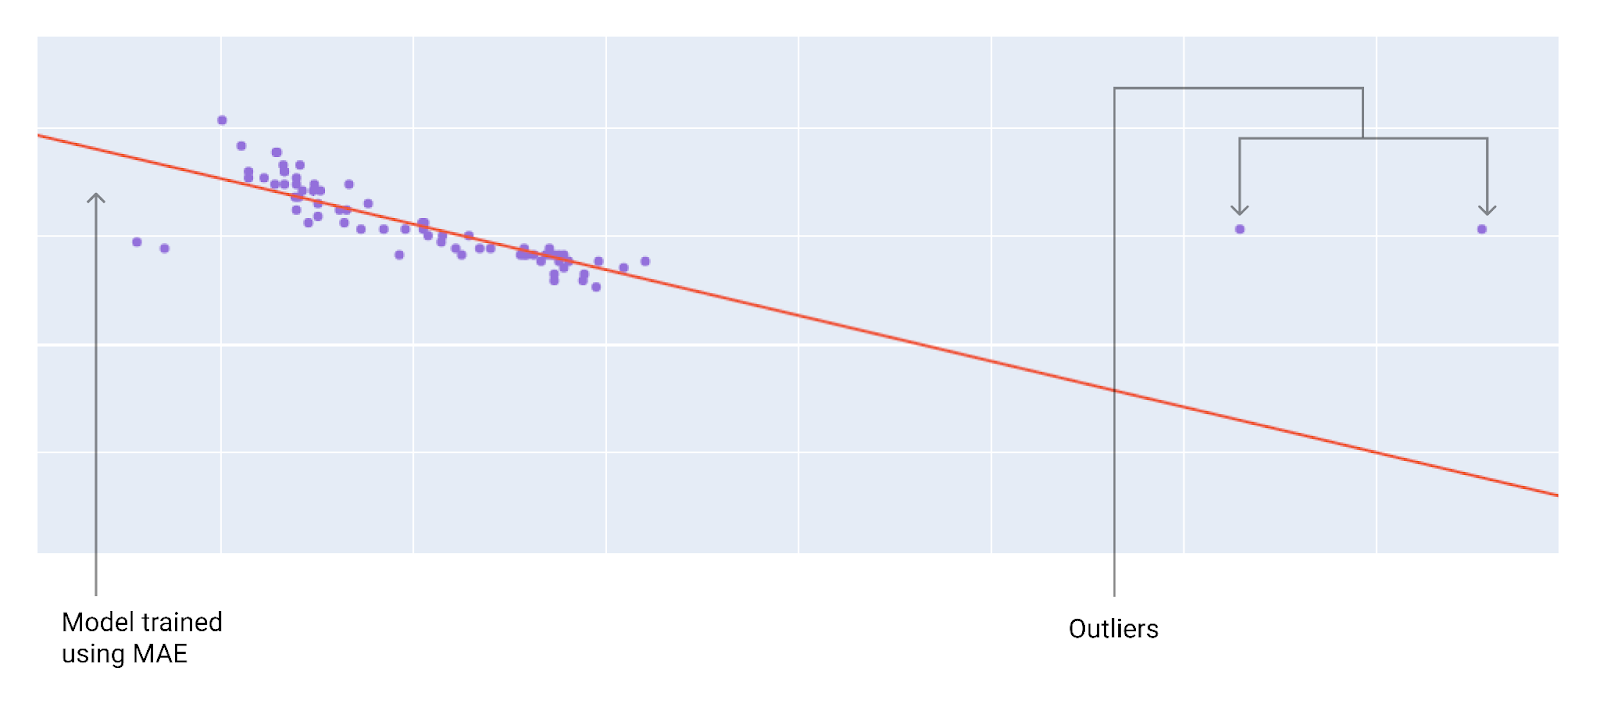


Note the relationship between the model and the data:

- MSE. The model is closer to the outliers but further away from most of the other data points.
- MAE. The model is further away from the outliers but closer to most of the other data points.

In [ ]:
## Testing with MSE

# conversion en GPU
model = model.cuda()
x = x.cuda()
y = y.cuda()

optimizer = torch.optim.Adam(model.parameters(), lr=1)
n_epochs = 500
loss_fn = torch.nn.MSELoss()

for i in range(n_epochs):
    optimizer.zero_grad()
    y_hat = model(x)
    loss = loss_fn(y_hat, y)
    loss.backward()
    optimizer.step()

    if i % 100 == 0:
        print(f"Epoch {i}, Loss: {loss.item()}")
        plt.figure()
        plt.plot(x.cpu(), y.cpu(), '-o', label='data')
        with torch.no_grad():
            plt.plot(x.cpu(), model(x).cpu(), '-o', label = 'prediction')
        plt.title(f'w1 = {model.w1.item()}, b = {model.b.item()}')
        plt.legend()
        plt.show()

print("Vraie valeur :", y[0].item())
print("Prédiction :", model(x)[0].item())

In [ ]:
## Testing with MAE 

# conversion en GPU
model = model.cuda()
x = x.cuda()
y = y.cuda()

optimizer = torch.optim.Adam(model.parameters(), lr=1)
n_epochs = 500
loss_fn = torch.nn.L1Loss()

for i in range(n_epochs):
    optimizer.zero_grad()
    y_hat = model(x)
    loss = loss_fn(y_hat, y)
    loss.backward()
    optimizer.step()

    if i % 100 == 0:
        print(f"Epoch {i}, Loss: {loss.item()}")
        plt.figure()
        plt.plot(x.cpu(), y.cpu(), '-o', label='data')
        with torch.no_grad():
            plt.plot(x.cpu(), model(x).cpu(), '-o', label = 'prediction')
        plt.title(f'w1 = {model.w1.item()}, b = {model.b.item()}')
        plt.legend()
        plt.show()

print("Vraie valeur :", y[0].item())
print("Prédiction :", model(x)[0].item())